<a href="https://colab.research.google.com/github/mareloraby/Sentiment-Analysis/blob/main/Hedonometer/HedonometerGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install statsmodels==0.12.1
from IPython.display import clear_output
clear_output()

import os
import re
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
clear_output()

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')


In [ ]:
hedonometer_results1 = pd.read_csv('/content/drive/MyDrive/NLP/COVID19data/hedonometer_results_020320.csv')
hedonometer_results1 = hedonometer_results1[26:]

hedonometer_results2 = pd.read_csv('/content/drive/MyDrive/NLP/COVID19data/hedonometer_results_040520.csv')


hedonometer_results3 = pd.read_csv('/content/drive/MyDrive/NLP/COVID19data/hedonometer_results_111220.csv')
hedonometer_results4 = pd.read_csv('/content/drive/MyDrive/NLP/COVID19data/hedonometer_results_01020321.csv')
hedonometer_results5 = pd.read_csv('/content/drive/MyDrive/NLP/COVID19data/hedonometer_results_04050621.csv')


In [ ]:
appended1 = hedonometer_results1.append(hedonometer_results2,ignore_index = True)
appended1 = appended1.loc[:,~appended1.columns.str.match("Unnamed")]

appended1['date'] = pd.to_datetime(appended1['date'],format="%Y-%m-%d")
appended1= appended1.set_index('date')

In [ ]:
appended2 = hedonometer_results3.append(hedonometer_results4,ignore_index = True).append(hedonometer_results5,ignore_index = True)
appended2 = appended2.loc[:,~appended2.columns.str.match("Unnamed")]

appended2['date'] = pd.to_datetime(appended2['date'],format="%Y-%m-%d")
appended2= appended2.set_index('date')
appended2

,h_score
date,
2020-11-01,5.787491
2020-11-02,5.765991
2020-11-03,5.826835
2020-11-04,5.791136
2020-11-05,5.856933
...,...
2021-06-26,5.791079
2021-06-27,5.839947
2021-06-28,5.847176


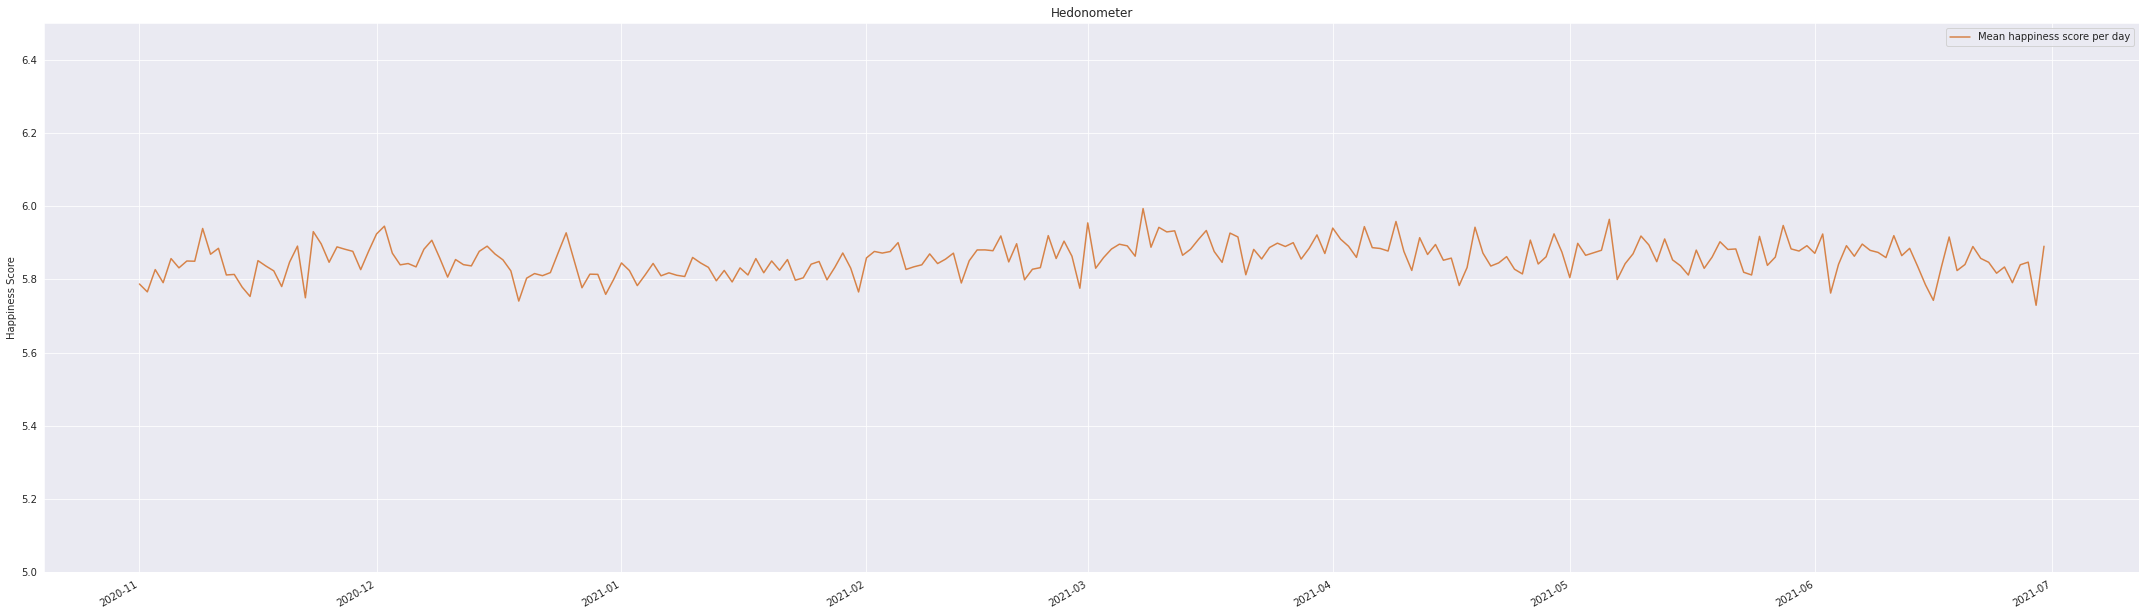

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot()
ax.plot(appended2.index,appended2.h_score,color='chocolate', alpha=0.8,label='Mean happiness score per day')


# from scipy.signal import savgol_filter
# yhat = savgol_filter(appended.score_norm, 93, 3)
# ax.plot(allgrouped.Datetime,yhat,color='darkcyan', label='Savgol smoothing - w = 93')

ax.set(title='Hedonometer', ylabel='Happiness Score')
ax.legend(loc='best')
fig.tight_layout()
plt.ylim([5.0,6.5])
plt.grid(True)

# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.show()